# Aotearoa open data crash statistics

### Import packages and data

In [1]:
# Import packages

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Import data and convert to a Geopandas dataframe

data = pd.read_csv("Crash_Analysis_System_(CAS)_data.csv")
data

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,...,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,1.569452e+06,5.178103e+06,1,NaN,595000.0,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
1,1.906804e+06,5.572517e+06,2,NaN,549100.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,Null
2,1.761685e+06,5.436885e+06,3,NaN,568501.0,0.0,NaN,0.0,2.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
3,1.793380e+06,5.500669e+06,4,NaN,564220.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Urban,1.0,0.0,0.0,Fine,Null
4,1.312310e+06,4.948991e+06,5,NaN,607800.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Fine,Null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814717,1.771279e+06,5.914733e+06,1311937,NaN,521602.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,Null
814718,1.842437e+06,5.923597e+06,1311938,NaN,533000.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Mist or Fog,Null
814719,1.778871e+06,5.876231e+06,1311939,40.0,521131.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Null,Null
814720,1.770733e+06,5.906526e+06,1311940,NaN,523713.0,0.0,NaN,0.0,1.0,NaN,...,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Null,Null


In [3]:
# Import population data by region (2018 census)

pop_2018 = pd.read_csv("2018 population by region and age.csv")
pop_2018

,Region,Total people - age group,Median age,Under 15 years,15-29 years,30-64 years,65 years and over
0,Northland Region,179076,42.6,37620,28836,77595,35025
1,Auckland Region,1571718,34.7,313839,357522,711186,189177
2,Waikato Region,458202,37.4,96765,90342,198063,73032
3,Bay of Plenty Region,308499,40.2,64182,53832,133386,57096
4,Gisborne Region,47517,37.0,11283,8766,20124,7344
5,Hawke's Bay Region,166368,40.6,34935,29202,71841,30390
6,Taranaki Region,117561,40.0,24666,19992,52464,20436
7,Manawatu-Wanganui Region,238797,39.4,47763,46650,101337,43044
8,Wellington Region,506814,37.2,93903,109317,231162,72426
9,Tasman Region,52389,46.0,9534,7626,24258,10974


## Exploratory Data Analysis

In [4]:
# Confirm that each row is a unique observation/crash

print("Number of unique observation IDs:", data.OBJECTID.nunique())
print("Number of rows:", data.shape[0])

Number of unique observation IDs: 814722
Number of rows: 814722


In [5]:
# Explore missing values

nans = data.isnull().sum().reset_index()
nans.columns = ["colName", "numNAN"]
nans = nans.sort_values(by="numNAN")
nans

,colName,numNAN
0,X,0
66,urban,0
59,trafficControl,0
53,streetLight,0
46,roadSurface,0
...,...,...
3,advisorySpeed,783689
40,pedestrian,788442
56,temporarySpeedLimit,802402
27,intersection,814722


In [6]:
# Inspect unique values and value counts for specific variables

def val_count(col_name):
    global data
    val_count_df = data[col_name].value_counts(dropna=False).reset_index()
    val_count_df.columns = ["value", "numObs"]
    print(col_name + ":")
    return val_count_df

val_count("holiday")

holiday:


,value,numObs
0,NaN,770167
1,Christmas New Year,20453
2,Easter,9344
3,Queens Birthday,7851
4,Labour Weekend,6907


In [7]:
# Update region names so they match crash data and check that there is a 1-1 match for all regions

pop_2018["Region"] = pop_2018["Region"].str.replace("Manawatu-Wanganui Region", "Manawatū-Whanganui Region")

pop_regions = pop_2018.Region.unique()
data_regions = data.region.unique()
data_regions = data_regions[~pd.isnull(data_regions)]


print("Regions that don't match:", np.setdiff1d(pop_regions, data_regions))

Regions that don't match: []


In [8]:
# Look at the number of crashes by region

total_by_region = data.groupby("region")["OBJECTID"].count().reset_index()
total_by_region.columns = ["region", "numCrashes"]
total_by_region = total_by_region.sort_values(by="numCrashes")
total_by_region

,region,numCrashes
15,West Coast Region,7165
12,Tasman Region,7474
7,Nelson Region,8021
6,Marlborough Region,8200
3,Gisborne Region,9684
11,Taranaki Region,18426
10,Southland Region,20080
4,Hawke's Bay Region,32063
8,Northland Region,32984
9,Otago Region,44244


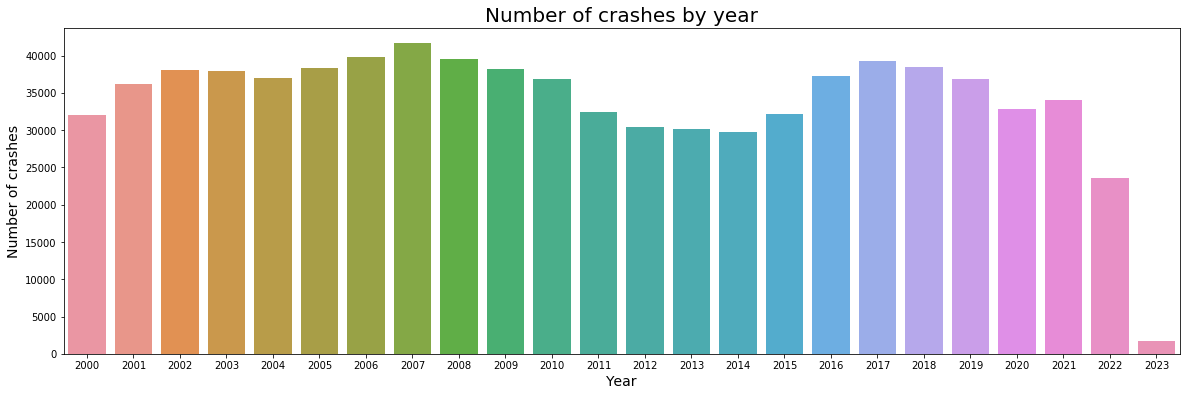

In [9]:
# Look at the number of crashes by year

plt.figure(figsize=(20,6))
sns.countplot(data=data, x="crashYear")
plt.title("Number of crashes by year", fontsize=20)
plt.ylabel("Number of crashes", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.show()

In [10]:
# Drop 2023 from the data as the year is incomplete

data = data.loc[data.crashYear < 2023]

In [11]:
# Explore crashes by region and year

region_year = data.groupby(["crashYear", "region"])["OBJECTID"].count().reset_index()
region_year = region_year.rename(columns={"OBJECTID": "numCrashes"})
region_year = region_year.loc[region_year.crashYear < 2023]
region_year = region_year.sort_values(by=["crashYear", "numCrashes"], ascending=False)
region_year

,crashYear,region,numCrashes
352,2022,Auckland Region,7117
365,2022,Waikato Region,2931
354,2022,Canterbury Region,2293
366,2022,Wellington Region,2108
357,2022,Manawatū-Whanganui Region,1702
...,...,...,...
3,2000,Gisborne Region,319
12,2000,Tasman Region,296
15,2000,West Coast Region,294
7,2000,Nelson Region,288


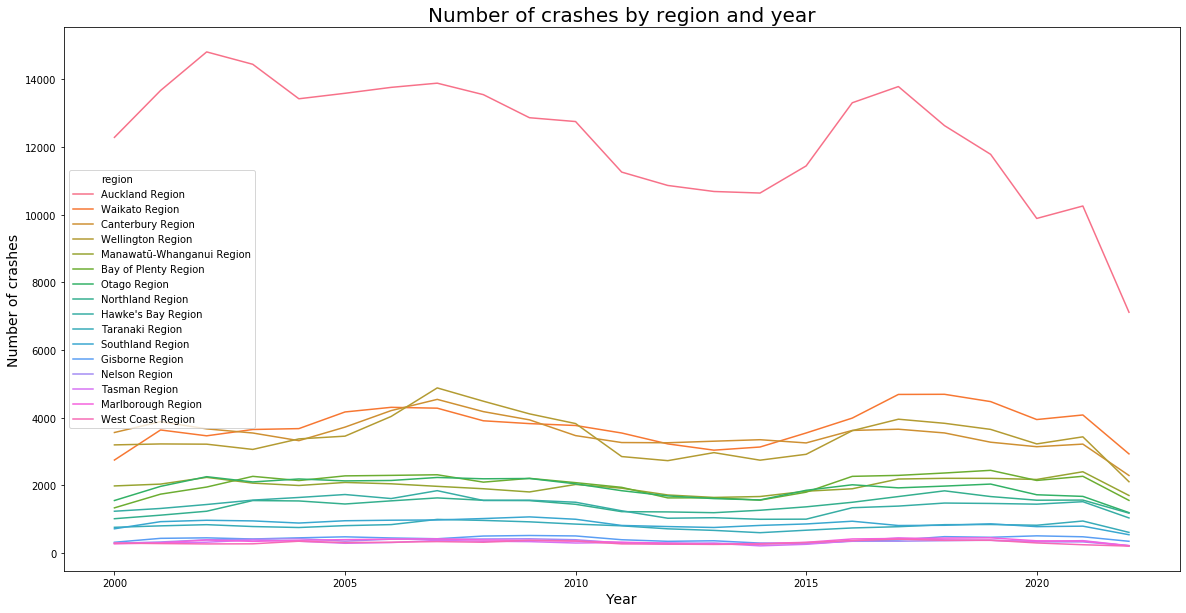

In [12]:
# Visualise number of crashes by region and year

plt.figure(figsize=(20,10))
sns.lineplot(data=region_year, x="crashYear", y="numCrashes", hue="region")
plt.title("Number of crashes by region and year", fontsize=20)
plt.ylabel("Number of crashes", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.show()

## Targeted analysis - crashes per capita
Given there is significant variation in the number of crashes by region (with Auckland over 3 times higher than other regions), use region populations to investigate crashes per capita.

The population data is taken from the 2018 census.

In [13]:
# Extract crashes from 2018 and keep some columns to explore

crashes_2018 = data.loc[data.crashYear == 2018].copy()
crashes_2018["holiday"] = crashes_2018["holiday"].fillna("Non-holiday")
crashes_2018 = crashes_2018.groupby(["region", "urban", "holiday"])["OBJECTID"].count().reset_index()
crashes_2018 = crashes_2018.rename(columns={"OBJECTID": "numCrashes"})
crashes_2018

,region,urban,holiday,numCrashes
0,Auckland Region,Open,Christmas New Year,65
1,Auckland Region,Open,Easter,39
2,Auckland Region,Open,Labour Weekend,19
3,Auckland Region,Open,Non-holiday,3113
4,Auckland Region,Open,Queens Birthday,22
...,...,...,...,...
148,West Coast Region,Open,Queens Birthday,8
149,West Coast Region,Urban,Christmas New Year,6
150,West Coast Region,Urban,Easter,4
151,West Coast Region,Urban,Non-holiday,109


In [14]:
# Look at total crashes per capita by region

total_pop = pop_2018[["Region", "Total people - age group"]].copy()
total_pop.columns = ["region", "population"]

crashes_per_cap = crashes_2018.groupby("region")["numCrashes"].sum().reset_index()
crashes_per_cap = crashes_per_cap.merge(total_pop, on="region", how="left")
crashes_per_cap["crashesPer10k"] = crashes_per_cap["numCrashes"] / (crashes_per_cap["population"] / 10000)
crashes_per_cap = crashes_per_cap.sort_values(by="crashesPer10k")
crashes_per_cap

,region,numCrashes,population,crashesPer10k
2,Canterbury Region,3550,599694,59.196857
11,Taranaki Region,839,117561,71.367205
7,Nelson Region,366,50880,71.933962
12,Tasman Region,390,52389,74.443108
14,Wellington Region,3835,506814,75.668786
1,Bay of Plenty Region,2366,308499,76.693928
0,Auckland Region,12632,1571718,80.370652
10,Southland Region,821,97467,84.233638
9,Otago Region,1979,225186,87.882906
4,Hawke's Bay Region,1478,166368,88.839200


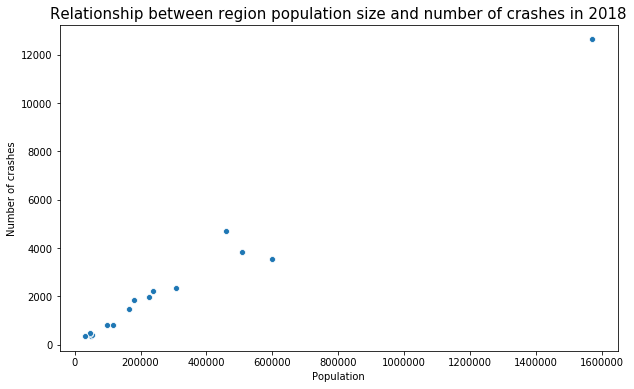

In [15]:
# Generate a scatter plot to confirm that there is a relationship between population size and crash prevalence

plt.figure(figsize=(10,6))
sns.scatterplot(data=crashes_per_cap, x="population", y="numCrashes")
plt.title("Relationship between region population size and number of crashes in 2018", fontsize=15)
plt.ylabel("Number of crashes", fontsize=10)
plt.xlabel("Population", fontsize=10)
plt.show()

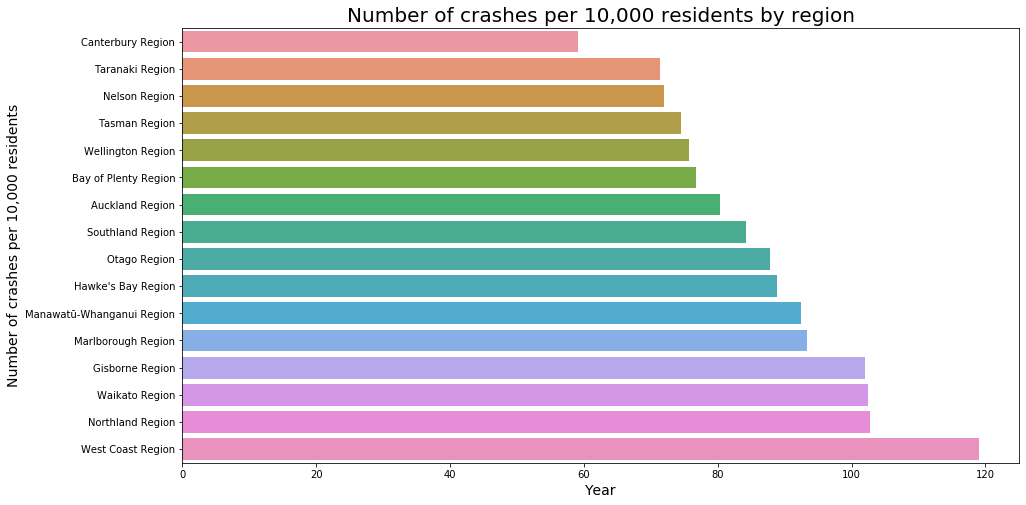

In [16]:
# Visualise the results

plt.figure(figsize=(15,8))
sns.barplot(data=crashes_per_cap, x="crashesPer10k", y="region", orient="h")
plt.title("Number of crashes per 10,000 residents by region", fontsize=20)
plt.ylabel("Number of crashes per 10,000 residents", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.show()

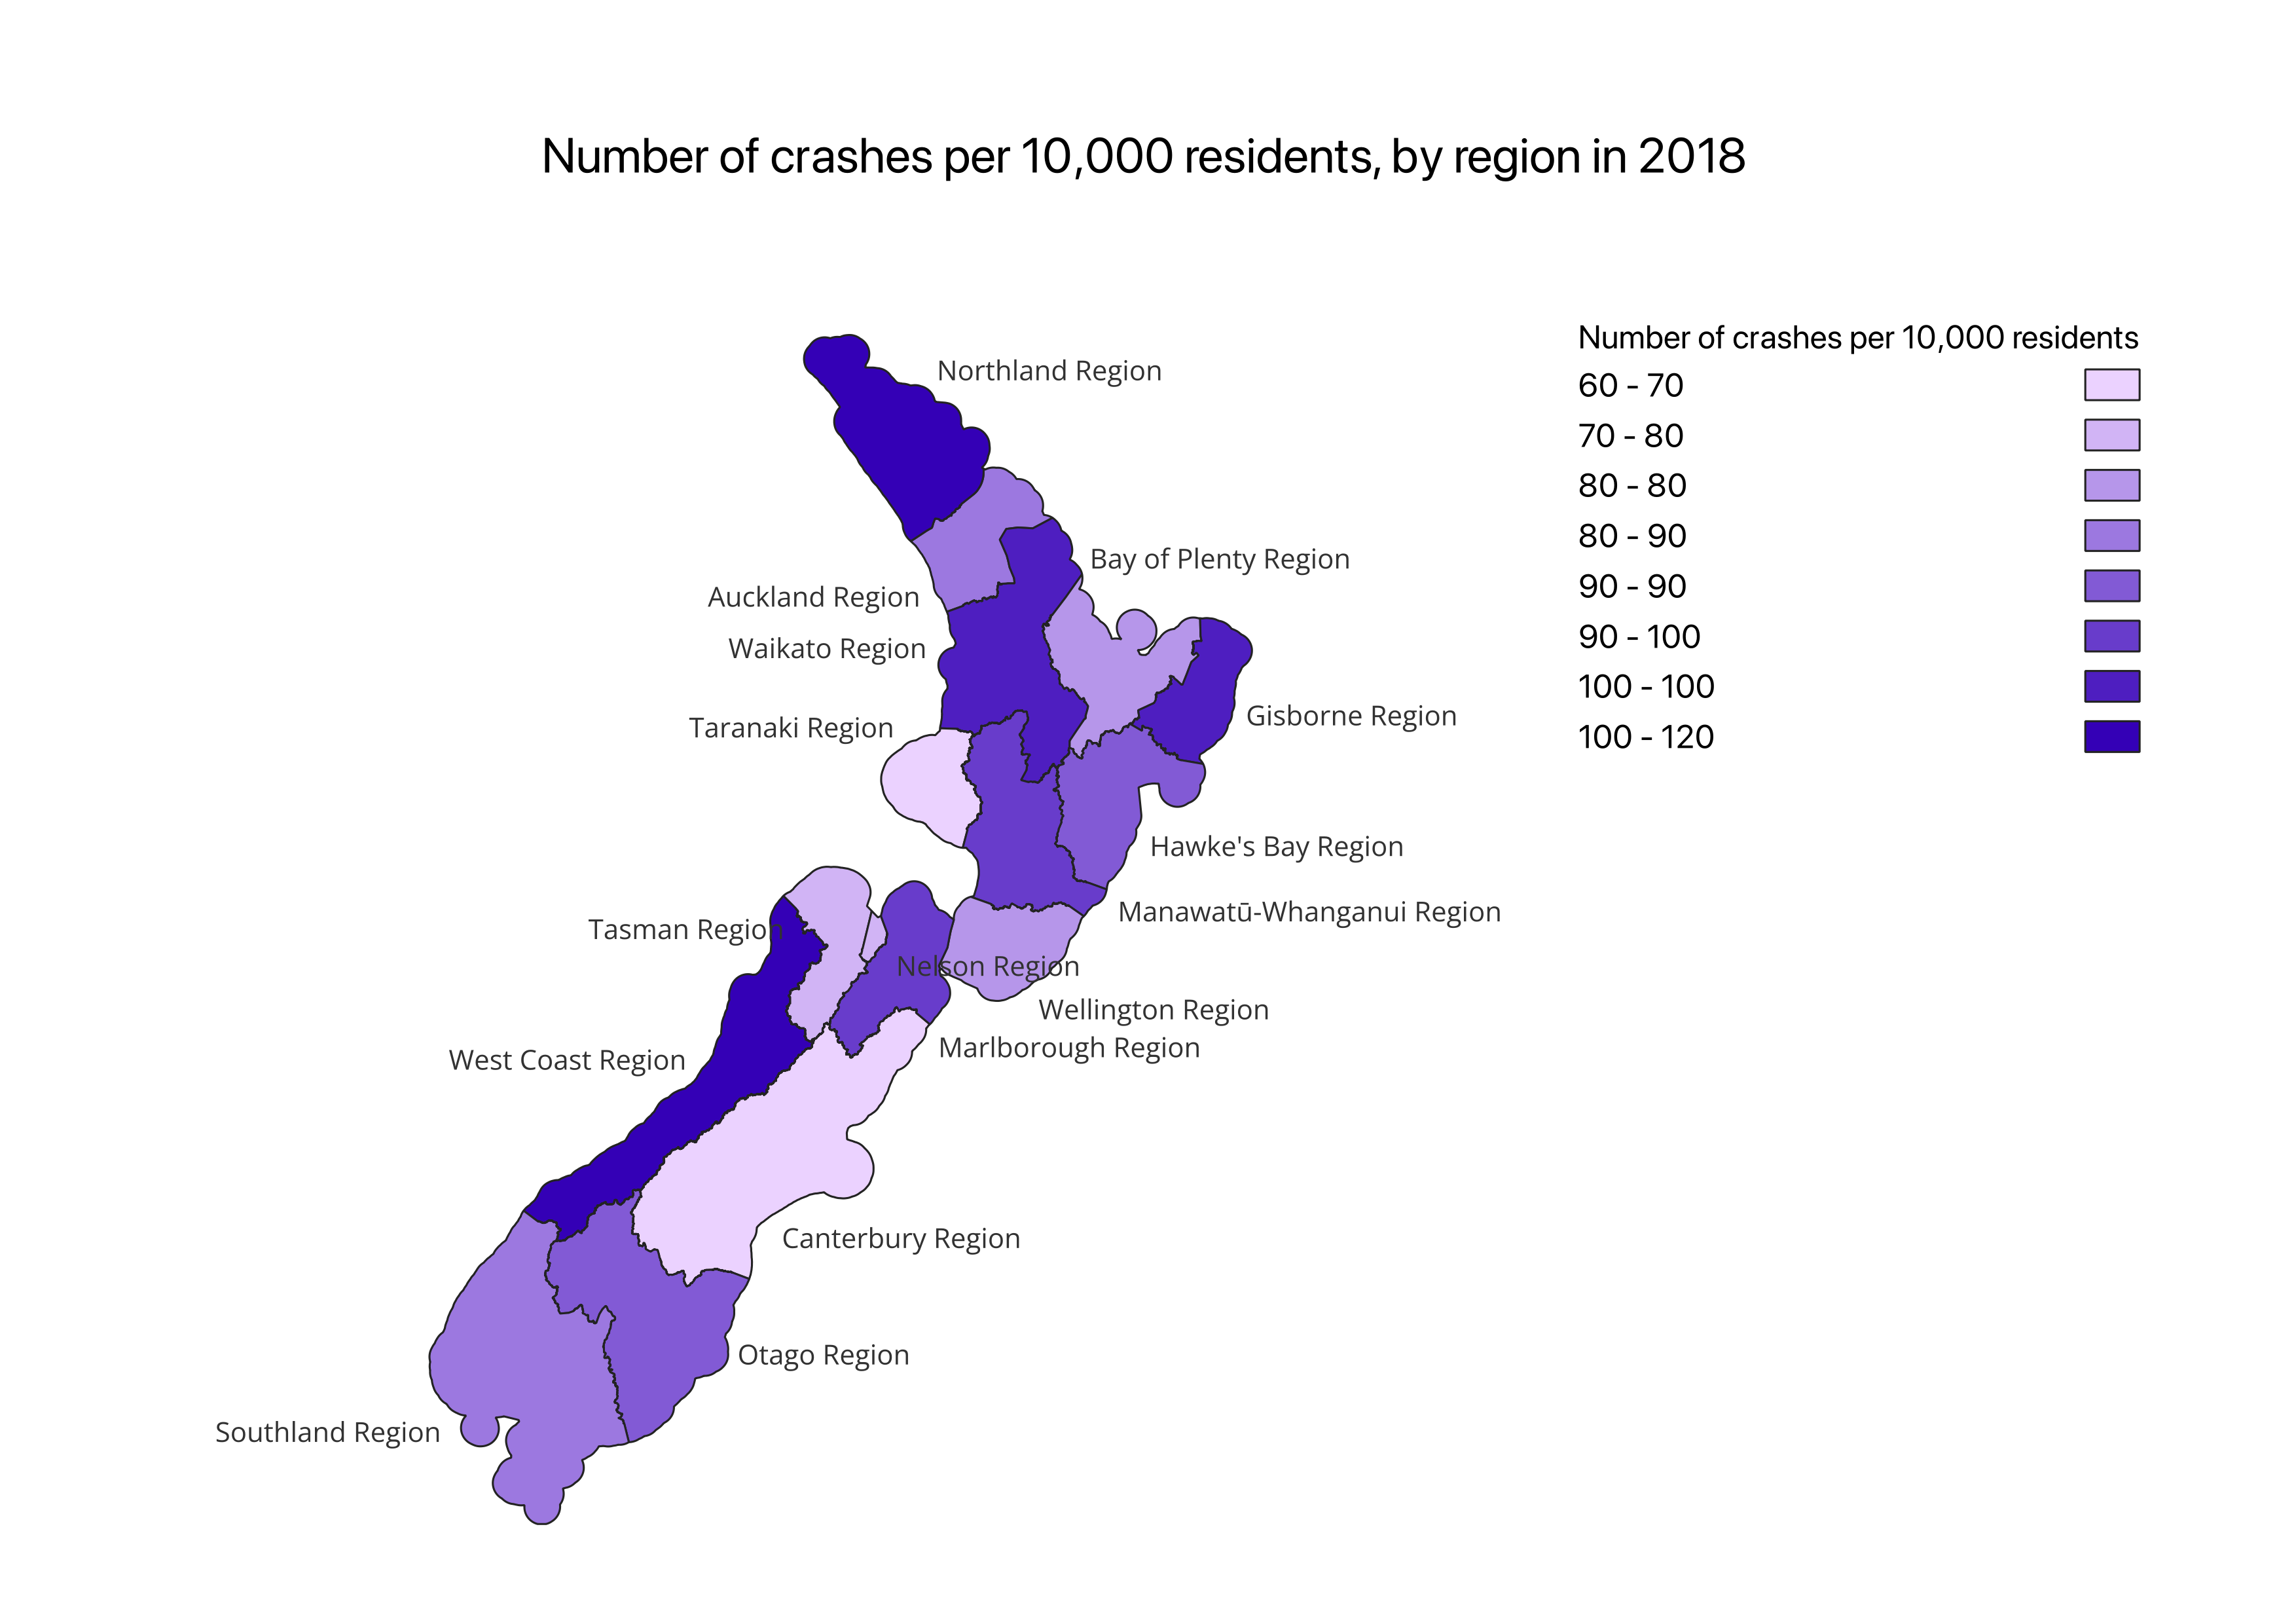

In [17]:
# Acknowledging that crashes are more likely to take place during public holidays (when people are more likely to
# travel outside of their region), investigate the proportion of crashes that take place during holidays

holidays = crashes_2018.copy()
holidays.loc[holidays.holiday != "Non-holiday", "holiday"] = "Holiday"
holidays = holidays.groupby(["region", "holiday"])["numCrashes"].sum().reset_index()
holidays["propHolidayCrash"] = holidays["numCrashes"] / holidays.groupby("region")["numCrashes"].transform("sum")
holidays = holidays.loc[holidays.holiday == "Holiday", ["region", "propHolidayCrash"]]
holidays = holidays.sort_values(by="propHolidayCrash")
holidays

,region,propHolidayCrash
12,Marlborough Region,0.024887
0,Auckland Region,0.043699
14,Nelson Region,0.046448
28,Wellington Region,0.046675
24,Tasman Region,0.048718
6,Gisborne Region,0.049485
4,Canterbury Region,0.053521
10,Manawatū-Whanganui Region,0.055229
22,Taranaki Region,0.056019
2,Bay of Plenty Region,0.061285


In [18]:
# Investigate whether crash prevalence is influenced by road type (urban vs open road)

crashes_road_type = crashes_2018.groupby(["region", "urban"])["numCrashes"].sum().reset_index()
crashes_road_type["propOpenRoad"] = crashes_road_type["numCrashes"] / crashes_road_type.groupby("region")["numCrashes"].transform("sum")
crashes_road_type = crashes_road_type.loc[crashes_road_type.urban == "Open", ["region", "propOpenRoad"]]
crashes_road_type = crashes_road_type.sort_values(by="propOpenRoad")
crashes_road_type

,region,propOpenRoad
14,Nelson Region,0.172131
28,Wellington Region,0.213299
0,Auckland Region,0.257916
4,Canterbury Region,0.312394
2,Bay of Plenty Region,0.335165
12,Marlborough Region,0.355204
8,Hawke's Bay Region,0.368742
6,Gisborne Region,0.377320
18,Otago Region,0.421425
10,Manawatū-Whanganui Region,0.433228


In [19]:
# Finally, investigate whether there is a relationship between median population age and crash prevalence

median_age = pop_2018[["Region", "  Median age"]].copy()
median_age.columns = ["region", "medianPopulationAge"]

crashes_age = crashes_per_cap.drop(columns="population")
crashes_age = crashes_age.merge(median_age, on="region", how="left")
crashes_age = crashes_age.sort_values(by="medianPopulationAge")
crashes_age

,region,numCrashes,crashesPer10k,medianPopulationAge
6,Auckland Region,12632,80.370652,34.7
12,Gisborne Region,485,102.068733,37.0
4,Wellington Region,3835,75.668786,37.2
13,Waikato Region,4692,102.400251,37.4
8,Otago Region,1979,87.882906,38.2
0,Canterbury Region,3550,59.196857,38.7
10,Manawatū-Whanganui Region,2209,92.505350,39.4
7,Southland Region,821,84.233638,39.8
1,Taranaki Region,839,71.367205,40.0
5,Bay of Plenty Region,2366,76.693928,40.2


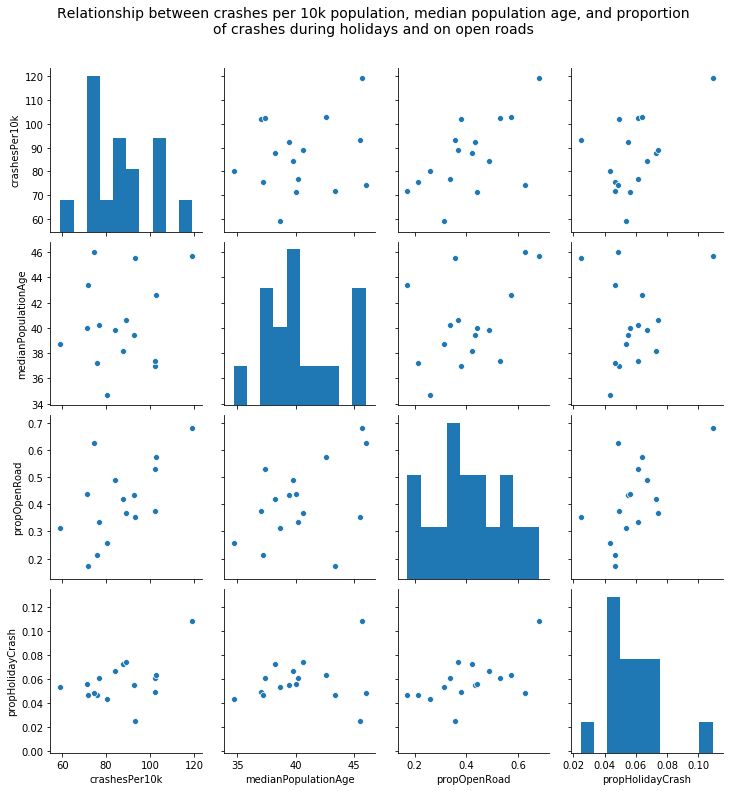

In [20]:
# Bring in the other features and visualise correlations via pairwise scatter plots

crash_relationships = crashes_age.drop(columns=["numCrashes"])
crash_relationships = crash_relationships.merge(crashes_road_type, on="region", how="left")
crash_relationships = crash_relationships.merge(holidays, on="region", how="left")

pplot = sns.pairplot(crash_relationships)
pplot.fig.suptitle("Relationship between crashes per 10k population, median population age, and proportion\nof crashes during holidays and on open roads",
                   y=1.08, 
                   fontsize=14)
plt.show()

In [21]:
# Save output for visualisation in QGIS

crashes_per_cap.to_csv("Crash output data.csv", index=False)